<a href="https://colab.research.google.com/github/xBrymer/TensorFlow-Basics/blob/master/Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications import vgg16


In [ ]:
image_size = (128,128,3)

vgg_conv = vgg16.VGG16(weights = 'imagenet', include_top = False,
                       input_shape = (image_size)
                       )

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
# Freeze the layers

for layer in vgg_conv.layers[:]:
  layer.trainable = False
for layer in vgg_conv.layers:
  print(layer, layer.trainable)


<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fd34c8076d8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd3188be6a0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd3188be9b0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fd3188be8d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd31802cac8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd3180465f8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fd3180469e8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd2c1819588> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd2c181c400> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd2c181c828> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fd2c1828400> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

Loading the images from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
TRAIN_DIR = "/content/gdrive/My Drive/External Datasets/Kaggle/Dogs-Vs-Cats/train"
TRAIN_CATS_DIR = "/content/gdrive/My Drive/External Datasets/Kaggle/Dogs-Vs-Cats/Train/Cats"
TRAIN_DOGS_DIR = "/content/gdrive/My Drive/External Datasets/Kaggle/Dogs-Vs-Cats/Train/Dogs"

TEST_DIR = "/content/gdrive/My Drive/External Datasets/Kaggle/Dogs-Vs-Cats/test1"
MAIN_DIR = "/content/gdrive/My Drive/External Datasets/Kaggle/Dogs-Vs-Cats/Train"


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)



In [ ]:
train_generator = train_datagen.flow_from_directory(
    MAIN_DIR,
    target_size = (128,128),
    batch_size = 50,
    class_mode = 'binary'
)


Found 25000 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
import os
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization
    


In [ ]:
model = Sequential()

model.add(vgg_conv)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              8389632   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3075      
Total params: 23,107,395
Trainable params: 8,392,707
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:


model.compile(
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
loss='sparse_categorical_crossentropy',
metrics=['sparse_categorical_accuracy'])




In [ ]:
cd '/content/gdrive/My Drive/External Datasets/Kaggle/Dogs-Vs-Cats'

/content/gdrive/My Drive/External Datasets/Kaggle/Dogs-Vs-Cats


In [ ]:
history = model.fit(train_generator, epochs = 5)

model.save('DvC-FineTuned.h5')

In [19]:
model.save('DvC-FineTuned -inc.h5')

In [20]:

probability_model = tf.keras.Sequential([
  model, tf.keras.layers.Softmax()                   
])

In [29]:
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt


In [21]:

def process_test_images(limit):
  test_images = []
  
  for image in tqdm(os.listdir(TEST_DIR)[:limit]):
       
    image = tf.keras.preprocessing.image.load_img(
        f'{TEST_DIR}/{image}',
        color_mode="rgb",
        interpolation="bilinear",
        target_size=(128, 128)
    )
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = np.array([image])/255
    image.reshape(128, 128, 3)

    test_images.append(image)

 
  return test_images

In [26]:

TEST_IMAGES = process_test_images(100)

In [27]:
TEST_IMAGES = np.reshape(TEST_IMAGES,(100,128,128,3))

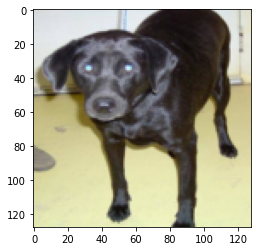

In [30]:
plt.imshow(TEST_IMAGES[5])

In [31]:

predictions = probability_model(TEST_IMAGES)
class_names = ['cat', 'dog']

In [44]:
def predict(index):
  plt.imshow(np.reshape(TEST_IMAGES[index], (128,128,3)))
  print(predictions[index])
  class_prediction = class_names[np.argmax(predictions[index])]
  print()

  cat_prediction = np.round(predictions[index][0]*100)
  dog_prediction = np.round(predictions[index][1]*100)
  print(f'I am {cat_prediction}% sure that this is a cat')
  print(f'I am {dog_prediction}% sure that this is a dog')
  print()
  print(f'So, I predict that this is a {class_prediction}')
  
  return



In [49]:
import random

tf.Tensor([0.3638162  0.40372887 0.2324549 ], shape=(3,), dtype=float32)

I am 36.0% sure that this is a cat
I am 40.0% sure that this is a dog

So, I predict that this is a dog


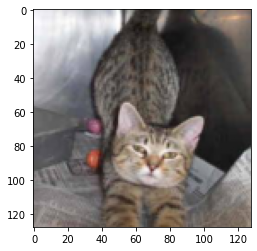

In [101]:


n = random.randint(0,99)

predict(n)